<a href="https://colab.research.google.com/github/DaveChui/Prep_Group-4-Project/blob/main/Week_2_Core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

#1. Defining the question

##a. Specifying the dat analytic questions

Figure out how we can predict which individuals are most likely to have or use a bank account.

#b. Define the metrics for success

####The project will entail the below steps:

---


#####Exploratory Data Analysis
#####Univariate, Bivariate and Multivariate analysis
#####Visualizations
#####Reduction techniques 
#####Mutiple Regression model

#c) Understanding the context
The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

#d) Recording the Experimental Design
#####1.Measure of central tendancy 
#####2.skewness
#####3.variance 
#####4.univariate analysis 
#####5.bivariate analysis 
#####6.multivariate analysis

#e) Data Relevance
######The main dataset contains demographic information and what financial services are used by individuals across East Africa.

---


#####This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:
#####FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/
#####Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016
#####Finscope Tanzania 2017:  http://www.fsdt.or.tz/finscope/
#####Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/ 

---


#####Dataset Files:
#####Variable Definitions: http://bit.ly/VariableDefinitions 
#####Dataset: http://bit.ly/FinancialDataset

#2. Loading the Data

In [25]:
#Import the required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the Data
# ---
FinancialDataset = pd.read_csv('FinancialDataset.csv', error_bad_lines=False)
#Preview our data
FinancialDataset.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 3. Checking the Data

In [27]:
#Check the number of records in the Dataset

FinancialDataset.shape

(23524, 13)

In [28]:
# Preview the top of the dataset
FinancialDataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [29]:
# Preview the bottom of the dataset
FinancialDataset.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [30]:
# Check for appropriate datatypes
FinancialDataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [31]:
#Check for basic descriptive statistics for the numeric fields
FinancialDataset.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [32]:
#Check the fields in the dataset

FinancialDataset.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

#4. Data Validation
According to the external data source from Financal Sector Deepening(FSD), the dataset is valid apart from the fictional years captured. e.g 2056, 2029

#5. Data Cleaning

In [33]:
#Drop uniqueid column which is not required in the analysis

FinancialDataset = FinancialDataset.drop(['uniqueid'], axis = 1)

In [34]:
#Format field names to lower case and remove spaces

FinancialDataset.columns = FinancialDataset.columns.str.lower().str.replace(" ", "_")

In [35]:
#Correct wrong field names i.e "level_of_educuation" and "the_relathip_with_head"

FinancialDataset.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace=True)
FinancialDataset.rename(columns={'level_of_educuation':'level_of_education'}, inplace=True)

In [36]:
#Confirm the field names

FinancialDataset.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [37]:
#Check for missing values per field

FinancialDataset.isnull().sum()

country                       14
year                           0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

In [38]:
#Drop the null values

FinancialDataset.dropna(inplace=True)

In [39]:
#Confirm that there are no missing values

FinancialDataset.isnull().sum()

country                       0
year                          0
has_a_bank_account            0
type_of_location              0
cell_phone_access             0
household_size                0
respondent_age                0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_education            0
type_of_job                   0
dtype: int64

<function matplotlib.pyplot.show>

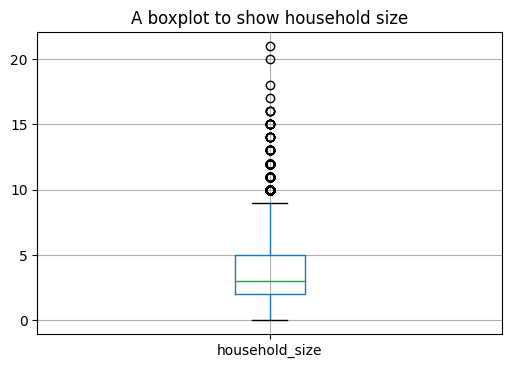

In [40]:
#Check for outliers in household_size of respondent_age 

plt.figure(dpi = 100)
FinancialDataset.boxplot(['household_size'])
plt.title("A boxplot to show household size")
plt.show

In [41]:
#removing outliers in household size column
lowscore,highscore = remove_outlier(FinancialDataset['household_size'])
FinancialDataset['household_size']=np.where(FinancialDataset['household_size']>highscore,highscore,FinancialDataset['household_size'])
FinancialDataset['household_size']=np.where(FinancialDataset['household_size']<lowscore,lowscore,FinancialDataset['household_size'])

<function matplotlib.pyplot.show>

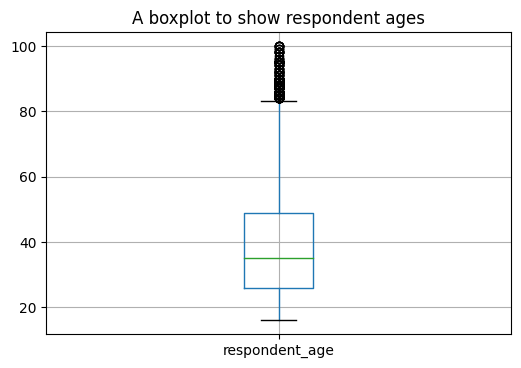

In [23]:
plt.figure(dpi = 100)
FinancialDataset.boxplot(['respondent_age'])
plt.title("A boxplot to show respondent ages")
plt.show

In [24]:
#remove outliers for Respondent age column
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  Lower_range= Q1-(1.5 * IQR)
  Upper_range= Q3+(1.5 * IQR)
  return Lower_range, Upper_range

<function matplotlib.pyplot.show>

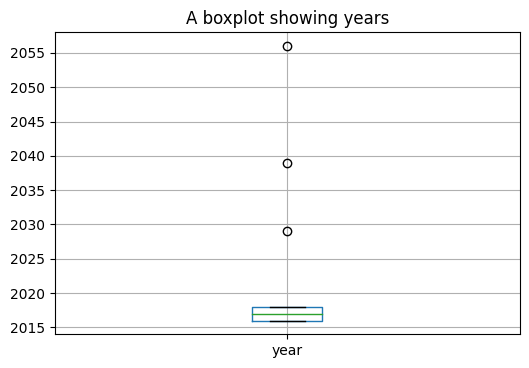

In [42]:
plt.figure(dpi = 100)
FinancialDataset.boxplot(['year'])
plt.title("A boxplot showing years")
plt.show

In [43]:
#Remove outliers in the year field
outliers = FinancialDataset[FinancialDataset['year'] > 2018].index
FinancialDataset.drop(outliers , inplace=True)
FinancialDataset.shape

(23340, 12)

In [44]:
FinancialDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23340 non-null  object 
 1   year                        23340 non-null  int64  
 2   has_a_bank_account          23340 non-null  object 
 3   type_of_location            23340 non-null  object 
 4   cell_phone_access           23340 non-null  object 
 5   household_size              23340 non-null  float64
 6   respondent_age              23340 non-null  float64
 7   gender_of_respondent        23340 non-null  object 
 8   the_relationship_with_head  23340 non-null  object 
 9   marital_status              23340 non-null  object 
 10  level_of_education          23340 non-null  object 
 11  type_of_job                 23340 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB


In [46]:
#dropping the rows containing the above years.

FinancialDataset.drop(FinancialDataset[FinancialDataset.year.isin([2029, 2056, 2039])].index, inplace=True)

In [47]:
FinancialDataset.year.unique()
#array([2018, 2029, 2056, 2016, 2039, 2017])

#year 2029, 2056, 2039 aren't in our scope hence they've been dropped

array([2018, 2016, 2017])

In [48]:
FinancialDataset.year.value_counts()

2016    8683
2018    8157
2017    6500
Name: year, dtype: int64

In [49]:
# convert the 'Year' column to datetime format
FinancialDataset['year']= pd.to_datetime(FinancialDataset['year'], format='%Y')

In [50]:
FinancialDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country                     23340 non-null  object        
 1   year                        23340 non-null  datetime64[ns]
 2   has_a_bank_account          23340 non-null  object        
 3   type_of_location            23340 non-null  object        
 4   cell_phone_access           23340 non-null  object        
 5   household_size              23340 non-null  float64       
 6   respondent_age              23340 non-null  float64       
 7   gender_of_respondent        23340 non-null  object        
 8   the_relationship_with_head  23340 non-null  object        
 9   marital_status              23340 non-null  object        
 10  level_of_education          23340 non-null  object        
 11  type_of_job                 23340 non-null  object    

#6. Exploratory Analysis

Univariate Analysis

In [51]:
#sumarry statistics
FinancialDataset.describe()

,household_size,respondent_age
count,23340.000000,23340.000000
mean,3.662339,38.807069
std,2.194161,16.519905
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,9.500000,100.000000


#Bar Graphs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


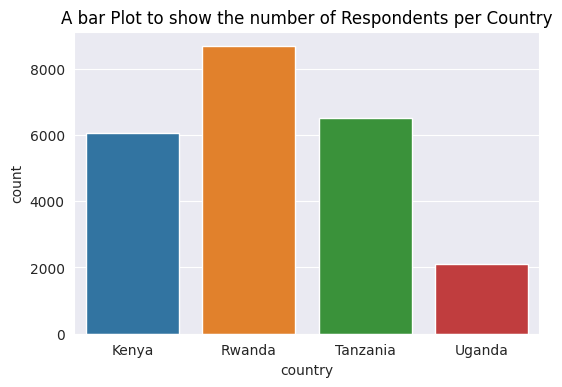

In [52]:
# A bar graph of the respondents per country 

# specify the chart size
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(FinancialDataset.country)

# Give a title and font color to our chart 
plt.title('A bar Plot to show the number of Respondents per Country', color = 'black')

# Display the chart
plt.show()


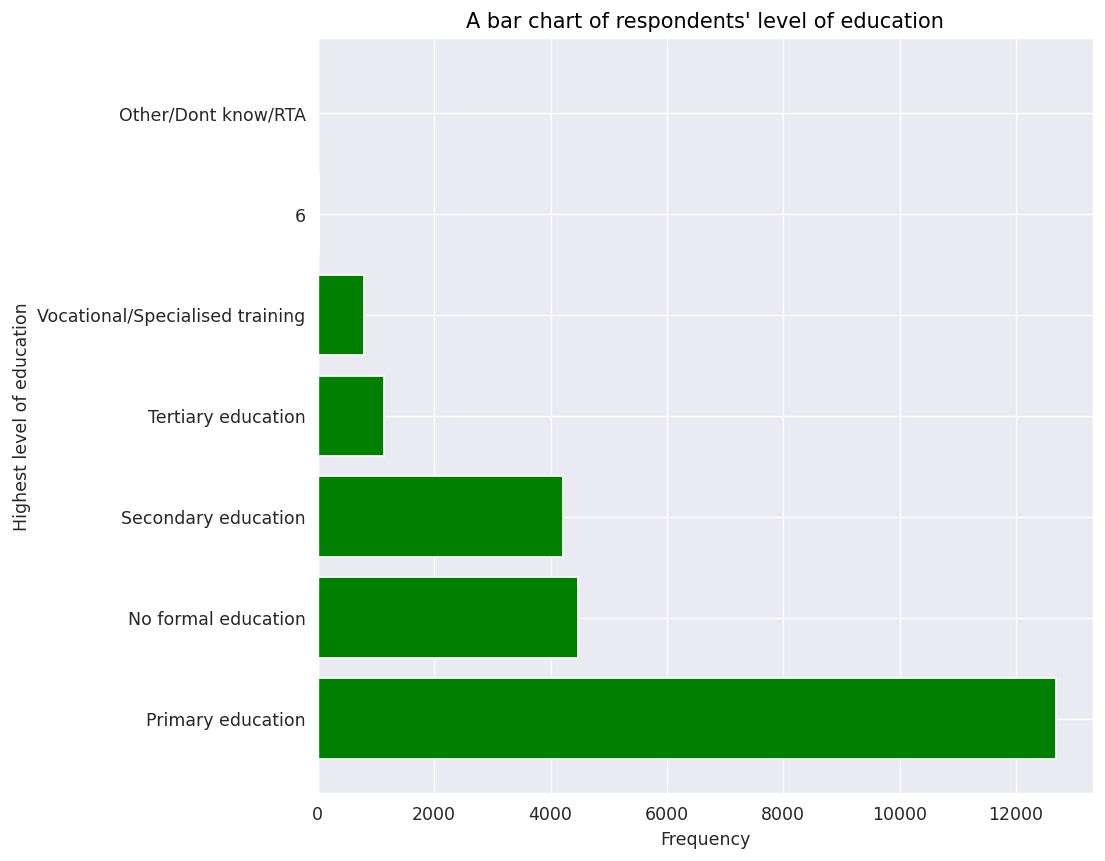

In [53]:
# A horizontal bar chart of the respondents' highest level of education 

# grouping the data to be plotted
study = FinancialDataset.level_of_education.value_counts()
study

# accessing the data to plot

# labels
size3= study.index
size3

# values
data3 = study.values
data3

# specifying our chart size
plt.figure(figsize = (8,8), dpi = 125)
plt.barh(size3, data3, color = 'green')

# labeling the y axis
plt.ylabel("Highest level of education")

# labeling the x axis
plt.xlabel('Frequency')

# Giving a title to our chart
plt.title("A bar chart of respondents' level of education", color = 'black')

# Displaying our chart
plt.show()


# most respondents' highest level of education was primary school


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


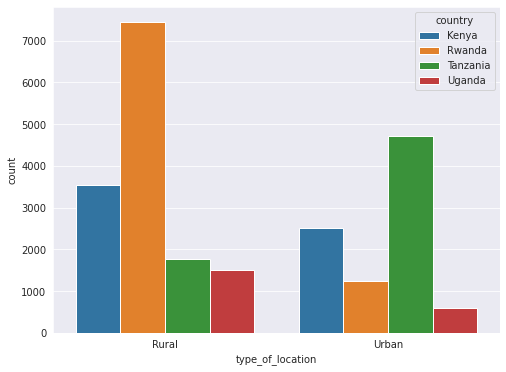

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(FinancialDataset.type_of_location, hue=FinancialDataset.country)
plt.show();

#The graph below shows rural/urban areas in the different countries

In [55]:
#Calculate measures of central tendency
FinancialDataset.mean()
print(FinancialDataset.mean())
FinancialDataset.mode()
print(FinancialDataset.mode())
FinancialDataset.median()
print(FinancialDataset.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


household_size     3.662339
respondent_age    38.807069
dtype: float64
  country       year has_a_bank_account type_of_location cell_phone_access  \
0  Rwanda 2016-01-01                 No            Rural               Yes   

   household_size  respondent_age gender_of_respondent  \
0             2.0            30.0               Female   

  the_relationship_with_head           marital_status level_of_education  \
0          Head of Household  Married/Living together  Primary education   

     type_of_job  
0  Self employed  
household_size     3.0
respondent_age    35.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will inclu

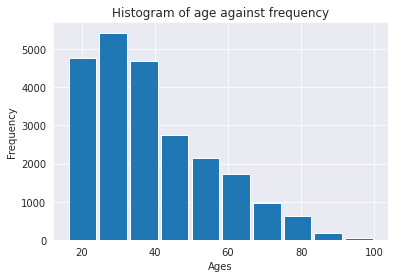

In [56]:
#Plotting a age histogram
age_points = FinancialDataset['respondent_age']

plt.hist(age_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of age against frequency')
plt.show()
#We can deduce that the greater population in the dataset is between the ages
# of 25 and 30.

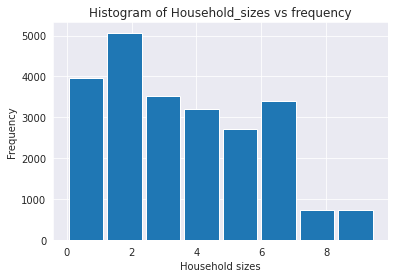

In [57]:
#Plotting a age histogram
size_points = FinancialDataset['household_size']

plt.hist(size_points, bins=8, histtype='bar', rwidth=0.9)
plt.xlabel('Household sizes')
plt.ylabel('Frequency')
plt.title('Histogram of Household_sizes vs frequency')
plt.show()


In [58]:
#min, max and range for age and household size
#age
min_age = FinancialDataset['respondent_age'].min()
print(min_age)
max_age = FinancialDataset['respondent_age'].max()
print(max_age)
range_age = max_age - min_age
print(range_age)
#For household size
min_size = FinancialDataset['household_size'].min()
print(min_size)
max_size = FinancialDataset['household_size'].max()
print(max_size)
range_size = max_size - min_size
print(range_size)

16.0
100.0
84.0
0.0
9.5
9.5


In [59]:
#Calculate quantiles
quantile_age = FinancialDataset["respondent_age"].quantile([0.25,0.5,0.75])
print(quantile_age)
quantile_size = FinancialDataset["household_size"].quantile([0.25,0.5,0.75])
print(quantile_size)

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


In [60]:
#Calculate measures of dispersion
st_dev = FinancialDataset.std()
print(st_dev)
skew = FinancialDataset.skew()
print(skew)
kurt = FinancialDataset.kurtosis()
print(kurt)

year              310 days 08:42:26.936346008
household_size                       2.194161
respondent_age                      16.519905
dtype: object
household_size    0.700081
respondent_age    0.840615
dtype: float64
household_size   -0.283137
respondent_age    0.098268
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


#Summary 
1. The mean household size is 3.61, Rwanda had the highest number of entries, the data for age was positively skewed at 0.44 meaning data is approximately skewed and kurtosis of -0.83. 
2.  The mean age is 40.25, Rwanda had the highest number of entries, the data for age was positively skewed at 0.75 meaning data is moderately skewed and has a kurtosis of -0.16. 


#7. Bivariate Analysis

We will perform Bivariate analysis, check relationships and differences between two variables. We will start with Numeric-Numeric variables, then Categorical-Categorical and lastly Categorical-Numeric variables

In [61]:
#Numeric-Numeric Variables
#Check for numeric variables in our data
#isolate numerical datatypes
numerical = FinancialDataset.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

household_size    float64
respondent_age    float64
dtype: object

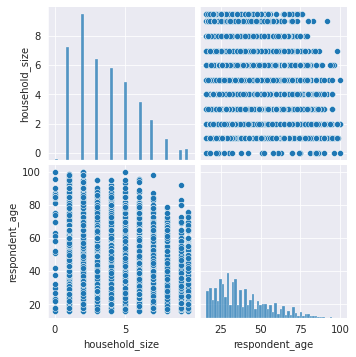

In [62]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(FinancialDataset)
plt.show()

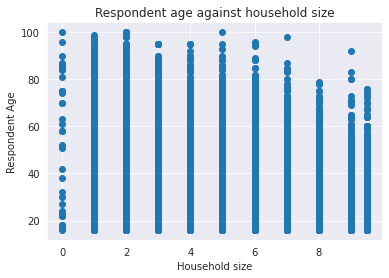

In [63]:
# Plotting a scatterplot

plt.scatter(FinancialDataset['household_size'], FinancialDataset['respondent_age'])

# Giving our scatterplot a title
plt.title('Respondent age against household size')

# Labelling our x axis
plt.xlabel('Household size')

# Labelling our y axis
plt.ylabel('Respondent Age')

# Displaying our scatterplot
plt.show()

In [64]:
# Calculate the pearson correlation coefficient
pearson_coeff = FinancialDataset['household_size'].corr(FinancialDataset['respondent_age'], method="pearson") 
print(pearson_coeff)
#There's a significant negative correlation

-0.12191002095718263


In [65]:
#Check the data count
FinancialDataset.type_of_job.value_counts()

Self employed                   6361
Informally employed             5549
Farming and Fishing             5422
Remittance Dependent            2508
Other Income                    1077
Formally employed Private       1047
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: type_of_job, dtype: int64

In [66]:
#Calculate the correlation
correlation = numerical.dropna().corr()
correlation

,household_size,respondent_age
household_size,1.00000,-0.12191
respondent_age,-0.12191,1.00000


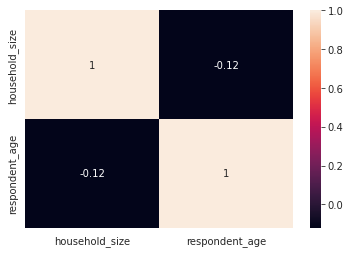

In [67]:
#plot a correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
#There is basically no correlation between household size and age of respondents

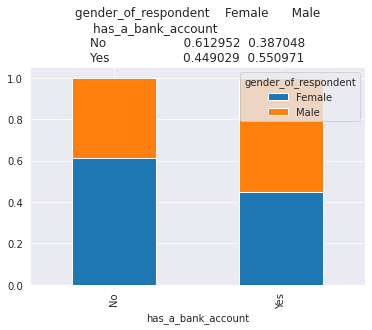

In [68]:
#check Which genger is most likely to have a bank account
ax1 = FinancialDataset.groupby('has_a_bank_account')['gender_of_respondent'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True',title=str(ax1))
int_level = FinancialDataset['has_a_bank_account'].value_counts()
#we can deduce that the difference between the male and female individuals who own a bank account is 
#quite evident. Males have a higher number.

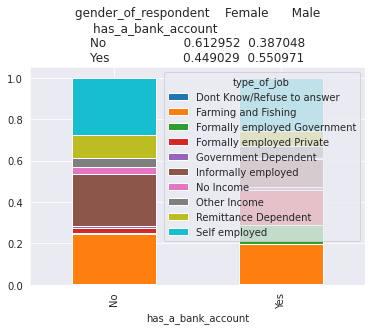

In [69]:
#From which working/non-working group does an account owner belong to?

ax2 = FinancialDataset.groupby('has_a_bank_account')['type_of_job'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',title=str(ax1))
int_level = FinancialDataset['has_a_bank_account'].value_counts()
#Individuals who are self employed are most likely to have a bank account and
# those who are informally employed are less likely to have a bank account


**Summary**

1.   The number of Males who own a bank account is significantly more than females.
2.   Individuals who are self employed are most likely to have a bank account and those who are informally employed are less likely to have a bank account
3. Individuals from urban setup are most likely to have a bank account and
those from rural areas are less likely to have a bank account
4.  Individuals with a secondary education are most likely to have a bank account and those with a primary level education are less likely to have a bank account
5. Individuals from Kenya are most likely to have a bank account and those Uganda are less likely to have a bank account
6. Individuals between the ages of 30-50, adults are most likely to have a bank account and those above 80years are less likely to have a bank account



Multivariate Analysis 

---


Perform the Linear Discriminant Analysis Reduction Technique and conduct the multiple regression analysis

The focus is on analyzing more than 2 statistical variables at once. We have many variables. To visualize patterns much better, we can reduce the variables into 2 or 3 significant ones without losing the essence of the data collected.

To analyse multiple categorical variables we can turn them into dummies (zeros and ones). Pandas can turn a categorical variables into a series of zeros and ones, making them easier to compare.

In [70]:
#Check for a relationship between dependent and independent variable
df= FinancialDataset.copy()
df.head(3)
to_nums = {"has_a_bank_account": {"Yes": 1, "No": 0},
           "type_of_location": {"Rural": 0, "Urban": 1},
           "gender_of_respondent": {"Female": 2, "Male": 3}}
import scipy.stats as stats

#To convert the columns to numbers using replace :
FinancialDataset.replace(to_nums, inplace=True)
print(FinancialDataset.head())
print(FinancialDataset.info())
#calculate point-biserial correlation
x = FinancialDataset['has_a_bank_account']
y = FinancialDataset['respondent_age']
stats.pointbiserialr(x, y)
#There is close to no linear correlation between age and having a bank account

x = FinancialDataset['has_a_bank_account']
y = FinancialDataset['household_size']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

x = FinancialDataset['has_a_bank_account']
y = FinancialDataset['type_of_location']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

x = FinancialDataset['has_a_bank_account']
y = FinancialDataset['gender_of_respondent']
stats.pointbiserialr(x, y)
#There is a weak correlation between gender and having a bank account

  country       year  has_a_bank_account  type_of_location cell_phone_access  \
0   Kenya 2018-01-01                   1                 0               Yes   
1   Kenya 2018-01-01                   0                 0                No   
2   Kenya 2018-01-01                   1                 1               Yes   
3   Kenya 2018-01-01                   0                 0               Yes   
4   Kenya 2018-01-01                   0                 1                No   

   household_size  respondent_age  gender_of_respondent  \
0             3.0            24.0                     2   
1             5.0            70.0                     2   
2             5.0            26.0                     3   
3             5.0            34.0                     2   
4             8.0            26.0                     3   

  the_relationship_with_head           marital_status  \
0                     Spouse  Married/Living together   
1          Head of Household                  Wido

PointbiserialrResult(correlation=0.11605756558778187, pvalue=8.476627554148982e-71)

In [71]:
# convert categorical variables into dummy variables with digits -  zeros and ones
# pd.get_dummies creates a new dataframe which consists of zeros and ones.

dummy = pd.get_dummies(FinancialDataset[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','the_relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head()

,type_of_location,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,cell_phone_access_No,cell_phone_access_Yes,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,...,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,0,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,2,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [72]:
# We have created new dataframe. To compare it to our original dataframe, we
# need to concatenate them to work with them appropriately.

# The dummy variables will be on the right side of the dataframe.
# As they are columns, we concatenate them on axis=1.

finance2 = pd.concat([FinancialDataset, dummy], axis = 1)
finance2.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,...,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,Kenya,2018-01-01,1,0,Yes,3.0,24.0,2,Spouse,Married/Living together,...,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018-01-01,0,0,No,5.0,70.0,2,Head of Household,Widowed,...,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018-01-01,1,1,Yes,5.0,26.0,3,Other relative,Single/Never Married,...,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018-01-01,0,0,Yes,5.0,34.0,2,Head of Household,Married/Living together,...,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018-01-01,0,1,No,8.0,26.0,3,Child,Single/Never Married,...,0,0,0,0,0,1,0,0,0,0


In [73]:
# Preprocessing steps

# The first step is to divide the dataset into;
# a feature set: X, 
# and corresponding label: y.


X = finance2.drop(columns = ['country', 'has_a_bank_account',	'type_of_location',	'cell_phone_access', 'household_size',	'respondent_age',	'gender_of_respondent',	'the_relationship_with_head',	'marital_status',	'level_of_education' ,	'type_of_job'], axis = 1)
y = finance2['has_a_bank_account']

In [74]:
X.head()

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,cell_phone_access_No,cell_phone_access_Yes,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,...,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018-01-01,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018-01-01,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2018-01-01,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018-01-01,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2018-01-01,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: has_a_bank_account, dtype: int64

In [81]:
# Step 2
# Splitting dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [83]:
# Step 3
# Normalization
# PCA performs best with a normalized FEATURE SET (X). 
# We will perform standard scaler normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TypeError: ignored